In [1]:
############# Updated on 15/1/2021
import pandas as pd
import numpy as np
import tensorflow as tf
import keras.backend as K

/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/userhome/35/yqdeng/anaconda3/lib/python3.7/site-packages/ten

In [2]:
df_train = pd.read_csv('news_set/train(originalwrong).csv')  #[date, title,abstract,article]
df_valid = pd.read_csv("news_set/validate(originalwrong).csv")
df_test = pd.read_csv("news_set/test(originalwrong).csv")

In [3]:
s_train = df_train['title'].values
s_valid = df_valid['title'].values
s_test = df_test['title'].values

In [4]:
s_train.shape,s_valid.shape,s_test.shape

((38454,), (13237,), (11712,))

In [5]:
s = np.r_[s_train,s_valid,s_test]
s.shape

(63403,)

In [6]:
pd.Series(s).describe()

count                                                 63403
unique                                                58508
top       boeing expects to overtake airbus sales reports .
freq                                                      2
dtype: object

In [8]:
x_train = pd.read_csv('news_set/train(originalwrong).csv').set_index('date')
x_train = x_train['title'].groupby(x_train.index).apply(list).apply(pd.Series).fillna('')
label = pd.read_csv('price_set/train_label(original wrong).csv').set_index('Date')

In [9]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
date,,,,,,,,,,,,,,,,,,,,,
2006-10-20,exxon mobil offers plan to end alaska dispute .,,,,,,,,,,...,,,,,,,,,,
2006-10-23,royal dutch bid for shell canada low sharehold...,dow ends at record high texas instruments off ...,shell looks to buy out canada unit for c xxx b...,ford is reviewing all products brands ceo .,at t earnings beat expectations .,ford won t sell ford credit .,,,,,...,,,,,,,,,,
2006-10-24,microsoft to start vista coupon plan for pc bu...,options scandal hits xxx companies us study .,u . s . tech stocks fall on texas instruments ...,ge wal mart shenzhen bank tie up on china cred...,lockheed martin ups forecast .,microsoft to defer xxx billion in sales to thi...,jim cramer bare escentuals allergan medicis av...,pepsico looks to new products acquisitions .,amazon profit beats expectations .,phelps dodge net doubles but off wall st . tar...,...,,,,,,,,,,
2006-10-25,boeing profit tops views but forecast disappoi...,u . s . stocks gain exxon and altria jump .,amazon profit beats forecasts .,honda q2 drops on finance losses yen lifts f c...,existing home sales fall for 6th straight month .,altria net hit by spain conwood lifts reynolds .,stocks seen up slightly after amazon results .,altria promises january details for kraft .,gm signals it is closer to labor deal with del...,gm posts profit but tough part of recovery loo...,...,,,,,,,,,,
2006-10-26,analysts sound note of caution on gm cash burn .,us airways reports loss after hedging .,comcast third quarter profit up on record subs...,microsoft profit rises 11 percent .,instant view 4 microsoft posts higher results .,dow chemical earnings rise on strong sales .,nissan us sales on track for oct double digit ...,us durable goods orders surge in september .,stocks gain on strong profits microsoft up late .,microsoft cfo says tender offer lowered outlook .,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-17,bank of america wins initial approval of 20 mi...,german budget committee won t give guidance on...,intel s sales forecast falls short of some ana...,volkswagen wins france with financing peugeot ...,morgan stanley german chief notheis steps down...,bank of america syncora settle mortgage fraud ...,mali preparing military action to take control...,german property sale said to draw blackstone m...,defense industry says budget cuts may cost 2 m...,gross says u . s . nearing recession as blackr...,...,,,,,,,,,,
2012-07-18,u . s . bancorp sells xxx billion of bonds aft...,abbott profit tops estimates as humira drug sa...,turkey yields sink third day to 10 month low o...,brazil said to plan tax rate cuts to lower ene...,visa europe should match mastercard fee cut al...,thai beverage to pay s xxx billion for ocbc s ...,bernanke says inflation to remain near fed s 2...,franken questions facebook on facial recogniti...,a netflix for magazines comes to ipad rich jar...,france will miss xxx offshore wind capacity ta...,...,,,,,,,,,,
2012-07-19,morgan stanley cuts pay pool for investment ba...,citigroup sees charge on smith barney valuation .,kazakhstan isn t planning to limit grain expor...,philly fed contracts home sales fall .,aig scorned by old republic for insuring homes...,kit digital shares fall to month low in prague...,textron earnings soar past wall street target .,amr ceo said to tell suitor he won t be rushed...,exxon mobil said to sell fuel oil shipment to ...,russian weather center predicts southern rain ...,...,,,,,,,,,,


In [10]:
x_train.shape, label.shape

((1994, 104), (1411, 1))

In [11]:
from keras.preprocessing import text,sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [12]:
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
sess = tf.Session(graph = tf.get_default_graph())
K.set_session(sess)

In [13]:
tokenizer = Tokenizer(lower = True,filters='\n\t')
tokenizer.fit_on_texts(s)

In [14]:
#######################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@Vocabulary size
vocab_size = len(tokenizer.word_index)+1
print('vocabulary size:{}'.format(vocab_size))  #vocabulary size:23364

vocabulary size:24759


In [15]:
x_train= tokenizer.texts_to_sequences(s_train)
x_valid= tokenizer.texts_to_sequences(s_valid)
x_test= tokenizer.texts_to_sequences(s_test)
x_all = tokenizer.texts_to_sequences(s)

In [16]:
word_num_train = [] #word_num in each sentence
word_num_valid = [] 
word_num_test = [] 
word_num_all = []   #word_num_all与其他不一样

for i in range(len(x_train)):
    word_num_train.append(len(x_train[i]))
#word_num 
for i in range(len(x_valid)):
    word_num_valid.append(len(x_valid[i]))

for i in range(len(x_test)):
    word_num_test.append(len(x_test[i]))

for i in range(len(x_all)):
    word_num_all.append(len(x_all[i]))



len(word_num_train),len(word_num_valid),len(word_num_test),len(word_num_all)

(38454, 13237, 11712, 63403)

In [17]:
x_train[0],s_train[0],len(x_train[0])

([110, 881, 465, 81, 2, 171, 2324, 667, 1],
 'exxon mobil offers plan to end alaska dispute .',
 9)

In [18]:
############################################################################## Training set, Validation set, Test set statistics
#word_num_train  #training set里面每个sentence的句子长度

In [19]:
pd.Series(word_num_train).describe()

count    38454.000000
mean        11.078795
std          2.369729
min          4.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         22.000000
dtype: float64

In [20]:
pd.Series(word_num_valid).describe()

count    13237.000000
mean        11.127219
std          1.834530
min          4.000000
25%         10.000000
50%         11.000000
75%         12.000000
max         19.000000
dtype: float64

In [21]:
pd.Series(word_num_test).describe()

count    11712.000000
mean        11.261783
std          1.885941
min          5.000000
25%         10.000000
50%         11.000000
75%         12.000000
max         19.000000
dtype: float64

In [22]:
pd.Series(word_num_all).describe()

count    63403.000000
mean        11.122707
std          2.184068
min          4.000000
25%         10.000000
50%         11.000000
75%         13.000000
max         22.000000
dtype: float64

In [23]:
word_num_all = []
s_list = list(s)
for i in range(len(s_list)):
    word_num_all.append(len(s_list[i]))

pd.Series(word_num_all).describe()

count    63403.000000
mean        58.866710
std          9.296794
min         19.000000
25%         53.000000
50%         59.000000
75%         64.000000
max         92.000000
dtype: float64

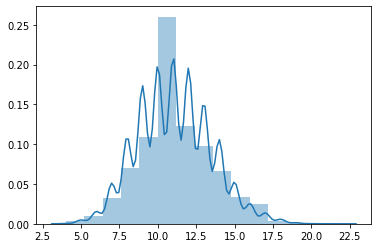

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(word_num_train, bins=15)
plt.show()

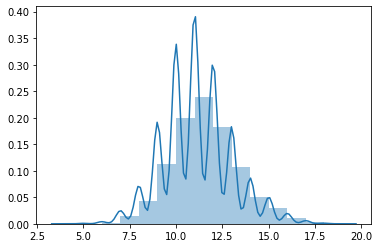

In [25]:
sns.distplot(word_num_valid, bins=15)
plt.show()

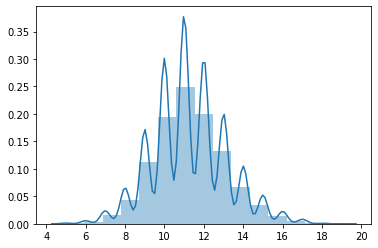

In [26]:
sns.distplot(word_num_test, bins=15)
plt.show()

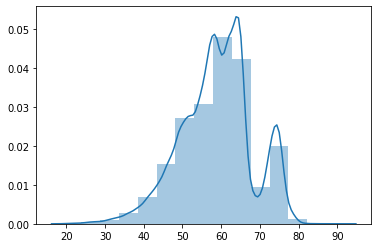

In [27]:
sns.distplot(word_num_all, bins=15)
plt.show()

In [30]:
word_num_train.index(max(word_num_train))
s_train[22634],x_train[22634],word_num_train[22634]

('u . s . yield is two basis points from the month s low on u . s . growth outlook .',
 [13,
  1,
  3,
  1,
  198,
  96,
  64,
  2500,
  1659,
  28,
  79,
  18,
  3,
  8,
  5,
  13,
  1,
  3,
  1,
  66,
  124,
  1],
 22)

In [35]:
word_num_test.index(max(word_num_test))
word_num_valid[532],word_num_test[2472],word_num_all[41465]

(19, 19, 92)

In [36]:
#word_num_valid.index(max(word_num_valid))
s_valid[532],x_valid[532],word_num_valid[532]

('u . k . gilt yields fall to fresh record low after u . s . jobs report .',
 [13, 1, 121, 1, 3196, 91, 43, 2, 2389, 46, 8, 23, 13, 1, 3, 1, 117, 61, 1],
 19)

In [38]:
word_num_all.index(max(word_num_all))
s[41465],x_all[41465],word_num_all[41465],len(s[41465])######### word_num_all 不等于 s

('samsung sold xxx million smartphones in second quarter almost twice what apple sold report .',
 [170, 934, 7, 39, 2118, 4, 217, 97, 702, 4479, 725, 17, 934, 61, 1],
 92,
 92)